### Create labels dataarray

In [1]:
import dask

import xarray as xr
import numpy as np
import pandas as pd
import dask.array as da


import warnings
warnings.filterwarnings('ignore')
from datetime import date

import matplotlib.pyplot as plt

print('loaded libraries')

loaded libraries


In [2]:
mt_path = "/pub/mariant3/WarmWaterMasses/02_tracking-mhws/"
dir_path = "/pub/hfdrake/datasets/CM4_MHW_blobs/"
ds = xr.open_dataset(f"{dir_path}/data/ocean_daily_cmip.01860101-01901231.tos.nc") #,chunks={'time':1}) #100
static = xr.open_dataset(f"{dir_path}/data/ocean_daily_cmip.static.nc")
ds_region = ds.sel(xh = slice(-138, 0), yh = slice(8, 49))
static_region = static.sel(xh = slice(-138, 0), yh = slice(8, 49))
ds_static_region = xr.merge([static_region,ds_region])

In [3]:
#load all blobs
blobs = xr.open_mfdataset(f"{mt_path}/*blobs.nc")

Relabel events

In [4]:
unique_years = np.unique(blobs.time.dt.year.values)

for i, year in enumerate(unique_years[1:]):
    print(year)
    print(i)
    print(f"year {year} calculation")
    N_before_year = blobs.labels.isel(time=(blobs.time.dt.year==year-1)).max().values
    print(N_before_year)
    blobs["labels"] = xr.where(blobs.time.dt.year==year, blobs.labels + N_before_year, blobs.labels)

187
0
year 187 calculation
56.0
188
1
year 188 calculation
92.0
189
2
year 189 calculation
140.0
190
3
year 190 calculation
198.0


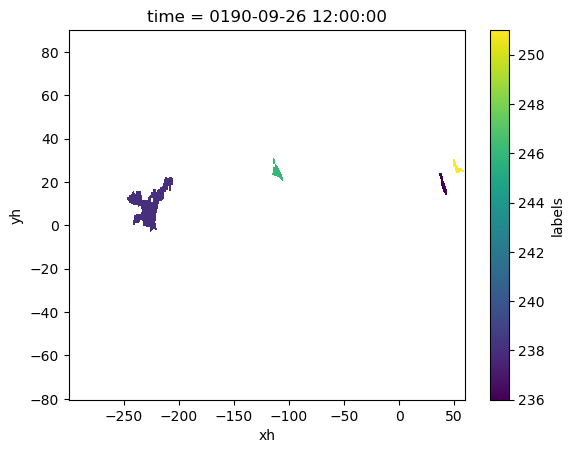

In [5]:
#Check that relabeling worked
blobs.labels.isel(time=830).plot()

In [7]:
#These are all the IDs (labels) in the region
ids = np.unique(blobs.labels.sel(xh = slice(-138, 0), yh = slice(8, 49)))
ids = np.array([id for id in ids if ~np.isnan(id)])
ids

array([  3.,   6.,  22.,  25.,  26.,  32.,  34.,  35.,  36.,  37.,  40.,
        41.,  42.,  45.,  48.,  49.,  50.,  51.,  55.,  56.,  58.,  69.,
        71.,  74.,  75.,  78.,  79.,  80.,  84.,  86.,  87.,  88.,  89.,
        90.,  91.,  94.,  98.,  99., 101., 103., 112., 113., 116., 118.,
       119., 120., 122., 127., 128., 130., 132., 133., 143., 145., 146.,
       148., 153., 156., 158., 159., 171., 184., 186., 189., 190., 194.,
       201., 202., 208., 212., 220., 221., 223., 224., 226., 227., 228.,
       231., 237., 242., 244., 246., 247., 249., 252., 256.])

In [7]:
reg_blobs = blobs.labels.sel(xh = slice(-138, 0), yh = slice(8, 49))

In [8]:
startday = blobs.time.values.astype(dtype='str')[0]
print(startday)
endday = blobs.time.values.astype(dtype='str')[-1]
print(endday)
#blobs.time.values.astype(dtype='datetime64[D]')[0]

0186-05-03 12:00:00
0190-10-20 12:00:00


In [10]:
ds_region_blobs = xr.merge([ds_region,reg_blobs],join='inner')
ds_region_blobs

<xarray.Dataset>
Dimensions:     (nv: 2, time: 855, xh: 547, yh: 193)
Coordinates:
  * nv          (nv) float64 1.0 2.0
  * time        (time) object 0186-05-03 12:00:00 ... 0190-10-20 12:00:00
  * xh          (xh) float64 -137.9 -137.7 -137.4 ... -0.7242 -0.4758 -0.2274
  * yh          (yh) float64 8.222 8.469 8.716 8.963 ... 48.43 48.59 48.76 48.92
Data variables:
    average_DT  (time) timedelta64[ns] ...
    average_T1  (time) object ...
    average_T2  (time) object ...
    time_bnds   (time, nv) object ...
    tos         (time, yh, xh) float32 ...
    labels      (time, yh, xh) float64 dask.array<chunksize=(171, 193, 547), meta=np.ndarray>
Attributes:
    filename:            ocean_daily_cmip.01860101-01901231.tos.nc
    title:               CM4_piControl_C_restartyear148
    associated_files:    areacello: 01860101.ocean_static.nc
    grid_type:           regular
    grid_tile:           N/A
    external_variables:  areacello

In [13]:
ds_region_blobs.values

<bound method Mapping.values of <xarray.Dataset>
Dimensions:     (nv: 2, time: 855, xh: 547, yh: 193)
Coordinates:
  * nv          (nv) float64 1.0 2.0
  * time        (time) object 0186-05-03 12:00:00 ... 0190-10-20 12:00:00
  * xh          (xh) float64 -137.9 -137.7 -137.4 ... -0.7242 -0.4758 -0.2274
  * yh          (yh) float64 8.222 8.469 8.716 8.963 ... 48.43 48.59 48.76 48.92
Data variables:
    average_DT  (time) timedelta64[ns] ...
    average_T1  (time) object ...
    average_T2  (time) object ...
    time_bnds   (time, nv) object ...
    tos         (time, yh, xh) float32 ...
    labels      (time, yh, xh) float64 dask.array<chunksize=(171, 193, 547), meta=np.ndarray>
Attributes:
    filename:            ocean_daily_cmip.01860101-01901231.tos.nc
    title:               CM4_piControl_C_restartyear148
    associated_files:    areacello: 01860101.ocean_static.nc
    grid_type:           regular
    grid_tile:           N/A
    external_variables:  areacello>

In [11]:
ds_region = ds.sel(xh = slice(-138, 0), yh = slice(8, 49)).sel(time=slice(startday,endday))
ds_region['tos'].time

<xarray.DataArray 'time' (time: 1631)>
array([cftime.DatetimeNoLeap(186, 5, 3, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 5, 4, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 5, 5, 12, 0, 0, 0, has_year_zero=True), ...,
       cftime.DatetimeNoLeap(190, 10, 18, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(190, 10, 19, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(190, 10, 20, 12, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 0186-05-03 12:00:00 ... 0190-10-20 12:00:00
Attributes:
    long_name:      time
    axis:           T
    calendar_type:  NOLEAP
    bounds:         time_bnds
    cell_methods:   time: mean

In [14]:
binary_out = ds_region_blobs['tos'].sel(xh = slice(-138, 0), yh = slice(8, 49)) > 29
lsmask = xr.ones_like(binary_out.isel(time=0))

In [15]:
# xarray Dataset to save
ds_out = xr.Dataset(
    data_vars=dict(
        blobs=(['time', 'yh', 'xh'], reg_blobs.values, reg_blobs.attrs),
        lsmask=(['yh', 'xh'], lsmask.values),

    ),
    coords=dict(
        xh=ds_region_blobs['tos'].xh,
        yh=ds_region_blobs['tos'].yh,
        time=ds_region_blobs['tos'].time,
    ),
    attrs=dict(description="Ocetrac labels",
               data="CM4.0 preprocessed for Ocetrac",
               threshold='90th percentile',
               climatology='entire period'),
)
ds_out

<xarray.Dataset>
Dimensions:  (time: 855, yh: 193, xh: 547)
Coordinates:
  * xh       (xh) float64 -137.9 -137.7 -137.4 ... -0.7242 -0.4758 -0.2274
  * yh       (yh) float64 8.222 8.469 8.716 8.963 ... 48.43 48.59 48.76 48.92
  * time     (time) object 0186-05-03 12:00:00 ... 0190-10-20 12:00:00
Data variables:
    blobs    (time, yh, xh) float64 nan nan nan nan nan ... nan nan nan nan nan
    lsmask   (yh, xh) bool True True True True True ... True True True True True
Attributes:
    description:  Ocetrac labels
    data:         CM4.0 preprocessed for Ocetrac
    threshold:    90th percentile
    climatology:  entire period

In [17]:
## for nomenclature
d = blobs.isel(time = 0).time.dt
e = blobs.isel(time = -1).time.dt
date_d = f"{d.year.values:0004}{d.month.values:02}{d.day.values:02}"
date_e = f"{e.year.values:0004}{e.month.values:02}{e.day.values:02}"
print(date_d)
print(date_e)

01860503
01901020


In [18]:
ds_out.to_netcdf(f"/pub/mariant3/WarmWaterMasses/02_tracking-mhws/{date_d}-{date_e}_ocetrac-labels-region.nc")